# 1. One-Way ANOVA

### One-Way ANOVA

**One-Way ANOVA** is used to compare the means of three or more independent groups to determine if at least one group mean is different from the others. It tests the null hypothesis that all group means are equal.

**Hypotheses for One-Way ANOVA**:
- **Null hypothesis (H₀)**: The means of all groups are equal.
- **Alternative hypothesis (H₁)**: At least one group mean is different.

The test statistic for One-Way ANOVA is:

$$
F = \frac{\text{Between-group variance}}{\text{Within-group variance}}
$$

Where:
- **Between-group variance** measures the variation due to the interaction between the different groups.
- **Within-group variance** measures the variation within each group.

If the calculated **F-statistic** is significantly larger than 1, we reject the null hypothesis, suggesting that at least one group mean is different.

### Example: Comparing Exam Scores Among Different Teaching Methods

In this example, we want to compare the average exam scores of students who were taught using three different teaching methods.



In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Simulating data for three teaching methods
np.random.seed(42)
method_1 = np.random.normal(80, 5, 30)  # Teaching Method 1 (mean = 80, std = 5)
method_2 = np.random.normal(85, 6, 30)  # Teaching Method 2 (mean = 85, std = 6)
method_3 = np.random.normal(90, 7, 30)  # Teaching Method 3 (mean = 90, std = 7)

# Data for the groups
data = [method_1, method_2, method_3]

# Perform One-Way ANOVA
f_statistic, p_value = stats.f_oneway(method_1, method_2, method_3)

# Display the results
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: At least one group mean is different.")
else:
    print("Fail to reject the null hypothesis: All group means are equal.")


F-statistic: 27.49
P-value: 0.0000
Reject the null hypothesis: At least one group mean is different.


# 2. Post-hoc Analysis (Tukey's HSD Test)
### Post-hoc Analysis

If the One-Way ANOVA results in a significant p-value, we need to conduct a **Post-hoc analysis** to determine exactly which groups differ from each other. One of the most common Post-hoc tests is the **Tukey's Honestly Significant Difference (HSD) test**.

**Tukey's HSD Test** compares the means of each possible pair of groups and adjusts for multiple comparisons. It calculates the difference between each pair of group means and provides a p-value to determine if the difference is statistically significant.

### Formula for Tukey's HSD:

$$
HSD = \frac{\text{Difference between means}}{\text{Standard error of the difference}}
$$

Where:
- The **Difference between means** is the absolute difference between the two means.
- The **Standard error** accounts for the variation within each group.

We perform the Tukey test after a significant result from ANOVA.

### Continuing with the Example: Post-hoc Analysis for Teaching Methods



In [2]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine data into a single array for Tukey's HSD
scores = np.concatenate([method_1, method_2, method_3])
labels = ['Method 1'] * len(method_1) + ['Method 2'] * len(method_2) + ['Method 3'] * len(method_3)

# Tukey's HSD Test
tukey = pairwise_tukeyhsd(scores, labels, alpha=0.05)

# Display the Tukey test results
print(tukey.summary())


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower   upper  reject
-------------------------------------------------------
Method 1 Method 2   5.2138 0.0021 1.6649  8.7626   True
Method 1 Method 3  11.0309    0.0 7.4821 14.5798   True
Method 2 Method 3   5.8172 0.0005 2.2683   9.366   True
-------------------------------------------------------


### Explanation of Output:
1. F-statistic: Indicates the ratio of variances between groups to within groups. A larger value suggests greater differences between groups compared to within-group variability.
   
2. p-value: Used to determine the significance of the F-statistic. If the p-value is less than 0.05 (alpha level), we reject the null hypothesis.

3. Tukey's HSD Results: The table will display the differences between pairs of groups, their confidence intervals, and p-values. If the p-value is less than 0.05, we conclude that the pair of groups is significantly different.

# Real-World Example


### Scenario 1: Comparing Employee Salaries Across Departments

In a company, we want to compare the salaries of employees across three departments: **Sales**, **Marketing**, and **Engineering**. The null hypothesis is that the average salary is the same across all departments, and the alternative hypothesis is that at least one department has a different average salary.

The ANOVA results will help us determine if there are any significant differences between the departments, and Tukey's test will show exactly which pairs of departments differ.



In [3]:
# Simulating data for employee salaries in different departments
sales = np.random.normal(60000, 5000, 30)
marketing = np.random.normal(65000, 6000, 30)
engineering = np.random.normal(70000, 7000, 30)

# Perform One-Way ANOVA
f_stat, p_val = stats.f_oneway(sales, marketing, engineering)
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.4f}")

# If significant, conduct Tukey's HSD test
if p_val < 0.05:
    scores = np.concatenate([sales, marketing, engineering])
    labels = ['Sales'] * len(sales) + ['Marketing'] * len(marketing) + ['Engineering'] * len(engineering)
    tukey_test = pairwise_tukeyhsd(scores, labels, alpha=0.05)
    print(tukey_test.summary())
else:
    print("Fail to reject the null hypothesis: Salaries are equal across departments.")


F-statistic: 32.58
P-value: 0.0000
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
   group1     group2    meandiff  p-adj     lower      upper    reject
----------------------------------------------------------------------
Engineering Marketing   -7521.255    0.0 -11118.0028 -3924.5073   True
Engineering     Sales -12052.7645    0.0 -15649.5122 -8456.0168   True
  Marketing     Sales  -4531.5094 0.0096  -8128.2572  -934.7617   True
----------------------------------------------------------------------


## Scenario 2: Comparing Product Prices Across Different Stores
In this case, we are comparing the prices of a product (say, a laptop) across different retail stores to determine if any store offers a significantly different price. A company wants to compare the prices of a product in three different stores: Store A, Store B, and Store C. The goal is to determine whether there are significant differences in the pricing across these stores.


Null Hypothesis (H₀): The mean prices are the same across the stores. Alternative Hypothesis (H₁): At least one store has a different price.

In [4]:
# Simulating product prices from three different stores
store_A = np.random.normal(500, 20, 30)  # Store A: mean = 500, std = 20
store_B = np.random.normal(510, 25, 30)  # Store B: mean = 510, std = 25
store_C = np.random.normal(520, 15, 30)  # Store C: mean = 520, std = 15

# Perform One-Way ANOVA
f_stat, p_val = stats.f_oneway(store_A, store_B, store_C)

# Display results
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.4f}")

# If p-value is significant, perform Tukey's HSD test
if p_val < 0.05:
    scores = np.concatenate([store_A, store_B, store_C])
    labels = ['Store A'] * len(store_A) + ['Store B'] * len(store_B) + ['Store C'] * len(store_C)
    tukey_test = pairwise_tukeyhsd(scores, labels, alpha=0.05)
    print(tukey_test.summary())
else:
    print("Fail to reject the null hypothesis: Prices are equal across stores.")


F-statistic: 4.39
P-value: 0.0152
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Store A Store B   9.8891 0.1887 -3.4971 23.2752  False
Store A Store C  16.5367 0.0114  3.1505 29.9228   True
Store B Store C   6.6476 0.4658 -6.7385 20.0338  False
------------------------------------------------------


## Scenario 3: Comparing Customer Satisfaction Ratings for Different Service Providers
Suppose a customer feedback survey is conducted for three service providers, and we want to determine if there is a significant difference in customer satisfaction scores. In this case, customer satisfaction scores are compared for Service Provider A, B, and C. The goal is to determine if one provider's customers report significantly different satisfaction levels.


In [5]:
# Simulating customer satisfaction ratings (1-10 scale)
provider_A = np.random.normal(7.8, 1.5, 30)  # Provider A: mean = 7.8, std = 1.5
provider_B = np.random.normal(8.5, 1.2, 30)  # Provider B: mean = 8.5, std = 1.2
provider_C = np.random.normal(6.9, 2.0, 30)  # Provider C: mean = 6.9, std = 2.0

# Perform One-Way ANOVA
f_stat, p_val = stats.f_oneway(provider_A, provider_B, provider_C)

# Display results
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.4f}")

# If p-value is significant, perform Tukey's HSD test
if p_val < 0.05:
    scores = np.concatenate([provider_A, provider_B, provider_C])
    labels = ['Provider A'] * len(provider_A) + ['Provider B'] * len(provider_B) + ['Provider C'] * len(provider_C)
    tukey_test = pairwise_tukeyhsd(scores, labels, alpha=0.05)
    print(tukey_test.summary())
else:
    print("Fail to reject the null hypothesis: Satisfaction ratings are equal across providers.")


F-statistic: 27.75
P-value: 0.0000
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
Provider A Provider B   0.8775 0.0196  0.1168  1.6382   True
Provider A Provider C  -1.4739    0.0 -2.2345 -0.7132   True
Provider B Provider C  -2.3514    0.0  -3.112 -1.5907   True
------------------------------------------------------------


## Scenario 4: Comparing Sales Performance Across Different Regions
In this case, sales figures from three regions are compared to determine if one region has higher or lower sales performance than the others. The goal is to determine if there is a significant difference in sales performance across three regions (North, South, and West).


In [6]:
# Simulating sales performance (in thousands)
north_sales = np.random.normal(100, 15, 30)  # North Region: mean = 100, std = 15
south_sales = np.random.normal(105, 10, 30)  # South Region: mean = 105, std = 10
west_sales = np.random.normal(110, 20, 30)   # West Region: mean = 110, std = 20

# Perform One-Way ANOVA
f_stat, p_val = stats.f_oneway(north_sales, south_sales, west_sales)

# Display results
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.4f}")

# If p-value is significant, perform Tukey's HSD test
if p_val < 0.05:
    scores = np.concatenate([north_sales, south_sales, west_sales])
    labels = ['North'] * len(north_sales) + ['South'] * len(south_sales) + ['West'] * len(west_sales)
    tukey_test = pairwise_tukeyhsd(scores, labels, alpha=0.05)
    print(tukey_test.summary())
else:
    print("Fail to reject the null hypothesis: Sales performance is equal across regions.")


F-statistic: 0.77
P-value: 0.4655
Fail to reject the null hypothesis: Sales performance is equal across regions.


# Data Visualization for better Understanding
We can include box plots to visualize the spread and distribution of the groups being compared. Box plots help in understanding the variance and identifying potential outliers.

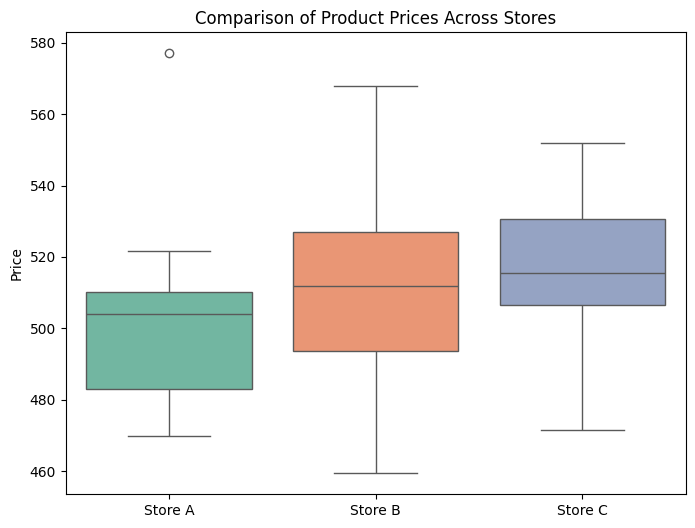

In [7]:
import seaborn as sns

# Combine all data for visualization
data = [store_A, store_B, store_C]
labels = ['Store A', 'Store B', 'Store C']

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, palette='Set2')
plt.xticks([0, 1, 2], labels)
plt.title("Comparison of Product Prices Across Stores")
plt.ylabel("Price")
plt.show()


 This visualizes the price distributions for each store, giving a more intuitive understanding of the data before performing ANOVA.